# Ⅰ. 주요 개념

##### 축약적 요약 Extractive Summarization
단어 그대로 원문에서 문장들을 추출해서 요약하는 방식이다. 가령, 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식이다. 그런데 꺼내온 3개의 문장이 원문에서 중요한 문장일 수는 있지만, 3개의 문장의 연결이 자연스럽지 않을 수는 있다. 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 접근한 것이다. 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용한다.

##### 추상적 요약 Abstractive Summarization
원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것이다.. 여기서 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미한다. 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역인 셈이다.

##### RNN(Recurrent neural network순환 신경망)  
문장, 음성데이터 등과 같은 시퀀스 데이타(관련이 있는 연속 데이터)의 동적 특징을 지니는 모델이다. 신경망 내부 상태를 저장할 수 있고 이것이 입력 데이터와 적용되어 출력물을 만든다. 

##### LSTM(Long Short-Term Memory) layer
RNN의 기울기 소실문제를 해결하기 위해 고안된 딥러닝 시스템이다. 망각게이트가 기울기 소실문제를 해결함으로써 오래전 데이터를 유지하여 활용할 수 있게 되었다. RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점이다.

##### seq2seq 모델
두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해내는 자연어 생성 모델입니다. 원문을 요약문으로 번역한다고 생각한다면 된다. 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환해요. 이 벡터를 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)라고 합니다. 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성하는 거죠.
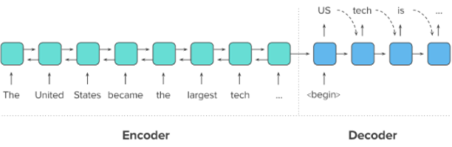

##### Attention Mechanism
인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식이다. 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점입니다. 이와 달리, 기본적인 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가집니다.

##### 불용어(stopwords) 
일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들.

##### 텍스트 정규화(text normalization) : 
같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있어요. 예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현이죠. 이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법을 텍스트 정규화라 한다. 다음은 정규화 사전 주소이다. https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

##### 토큰나이저
컴퓨터는 숫자만을 다룰 수 있으므로 텍스트 데이터를 숫자화하는 작업을 말하는 것으로, 일명 단어장 작성이라고도 하며, 케라스의 토큰나이저 클라스를 사용한다.

##### 패딩(padding)
데이터를 모델에 적용하여 학습시키기 위해서는 텐서로 변환함과 아울러 동일한 크기의 자료로 만들어야 한다. 동일한 크기를 만들기 위해 작은 데이터는 크기를 맞추기 위해 0으로 채우게 된다. 이것을 패딩이라한다.

##### Variational Dropout
아래 그림은 일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 것을 시각적으로 표현한 것입니다. 색이 있는 화살표는 dropout을 나타낸 것이에요. (색이 다른 것은 다른 dropout mask를 사용했다는 표시인데, 지금은 그냥 넘어가셔도 됩니다.) 우리가 현재 사용한 LSTM은 dropout과 recurrent dropout을 모두 사용했으니 오른쪽 그림과 같은 형태겠군요. 참고로 dropout과 recurrent dropout을 모두 사용한 것을 Variational Dropout이라고도 해요.


# Ⅱ. 프로세스와 주요 함수/클래스

## 1. 프로세스
### (1) 데이터 전처리
① 데이터 정리 : 중복 제거, Null 제거, 텍스트 정규화와 불용어 제거   
② 훈련/테스트 데이터 나누기 : 샘플 최대길이 확정, 시작토큰/종료토큰 추가, 훈련데이터와 테스트 데이터 분리      
③ 정수 인코딩 : 단어장 만들기 및 정수 인코딩, 패딩하기   

### (2) 모델 설계
① seq2seq를 사용합니다.   
② RNN 계열 중 LSTM을 사용하므로 hidden state뿐만 아니라 cell state도 사용해야 합니다.   
③ 디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙입니다.   
④ seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작합니다.   
⑤ seq2seq 기본 모델과 달리, 어텐션 메커니즘을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산합니다.   
⑥ 계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측합니다.   

## 2. 패키지의 함수/클래스

##### pandas  (데이터프레임 관련 메서드)
- drop_duplicates() : 중복 샘플 제거   
- isnull().sum() : Null값 확인   
- dropna() : Null값 제거

##### nltk
- 불용어(stopwords) 사전 다운로드

##### keras
- preprocessing.text.Tokenizer : 텍스트 데이터를 숫자화하는 클래스     
- preprocessing.sequence.pad_sequences : 패딩작업

##### summa
- summarizer.summrize : 추출적 요약을 실행

# Ⅲ. 코드(프로젝트 : 뉴스 기사 요약)

## 1. 데이터 수집

데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하세요.

sunnysai12345/News_Summary
https://github.com/sunnysai12345/News_Summary

아래의 코드로 데이터를 다운로드할 수 있어요.

In [ ]:
# !pip install nltk      # nltk-3.6.5
# sudo apt-get install python3-lxml # 리눅스 명령어
# !pip install lxml           #(4.6.4)
# !pip install html5lib    # html5lib-1.1

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
# import lxml
# from html5lib import html, markup
# soup_object= BeautifulSoup(html,'lxml') # C dependent parser

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


=3


In [2]:
# 뉴스 데이터 가져오기

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
22780,"Sikh man beaten in US, told to 'go back to his...",A Sikh man was beaten up multiple times by two...
61806,'Wrongly' arrested Ryan conductor to sue Harya...,"Bus conductor Ashok Kumar, who was arrested fo..."
58928,Congress workers protest GST dressed up as Sho...,Congress workers in Surat dressed up as charac...
62935,"Pak issues visas to 2,600 Sikhs ahead of Guru ...","Pakistan has granted visas to 2,600 Sikh pilgr..."
16740,68-yr-old gets 5-yr jail for attempting to rap...,A 68-year-old man has been sentenced to five y...
96370,Sorry to disappoint people but I'm not pregnan...,"Actress Bipasha Basu, while denying reports th..."
89883,Bieber is role model for millennial generation...,Sarod maestro Ustad Amjad Ali Khan has said th...
72897,"Air India will continue to add routes, planes:...",Air India's new Chairman and Managing Director...
61247,Can't risk women's safety: Delhi govt on Odd-E...,"Delhi government, while urging the National Gr..."
94927,US court extends civil rights protections to L...,A US Federal Court has extended civil rights p...


이 데이터는 기사의 본문에 해당되는 text와 headlines 두 가지 열로 구성되어져 있다.

추상적 요약을 하는 경우에는 text를 본문, headlines를 이미 요약된 데이터로 삼아서 모델을 학습할 수 있어요. 추출적 요약을 하는 경우에는 오직 text열만을 사용한다.

## 2. 데이터 전처리하기 

실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요. 만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

### (1) 데이터 정리하기

### 중복 샘플 제거

In [4]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [5]:
# drop_duplicates()를 사용하여 중복 샘플을 제거
# inplace=True 를 설정하면 
# DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### NULL 값이 존재하는 샘플 제거

In [6]:
# 데이터프레임에 Null 값이 있는지 확인
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### 텍스트 정규화와 불용어 제거

In [8]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [9]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [10]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [11]:
# 데이터 전처리함수 preprocess_sentence()를 테스트
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [12]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print(clean_text[:5])


clean_headlines = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print(clean_headlines[:5])

['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illne

In [13]:
clean_text[:1]

['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers']

In [14]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [15]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [16]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### (2) 훈련데이터와 테스트데이터 나누기

### 샘플의 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


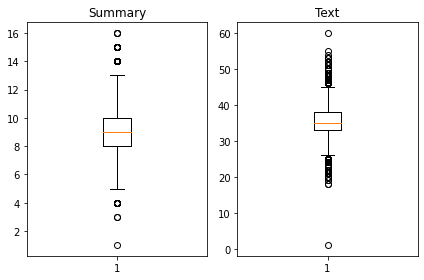

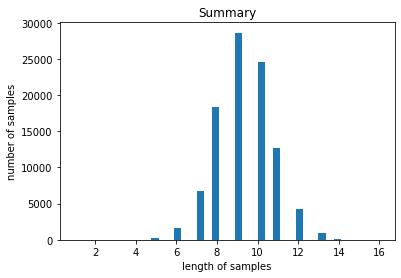

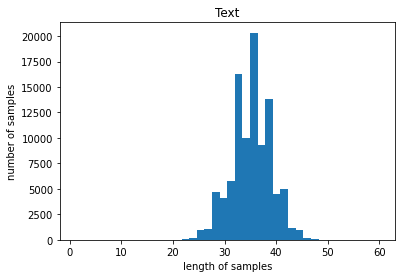

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- text : 이상치를 제외하면 25에서 45의 길이의 분포. 평균 35이고 예외적으로 작은 1과 60은 의미있는 영향을 주지 않을 것으로 봄.   
- headlines의 경우 최소 길이가 1, 최대 길이가 16, 그리고 평균 길이가 9로 Text에 비해 상대적으로 길이가 매우 짧아요. 그래프로 봤을 때에도 대체적으로 10이하의 길이를 한도로 정함.

In [18]:
#  Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정함.
text_max_len = 42
summary_max_len = 10

In [19]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [20]:
'''
# below_threshold_len()함수를 Text와 Summary에 적용해 
# 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인
'''
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

전체 샘플 중 길이가 42 이하인 샘플의 비율: 0.9750305002033347
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8162972753151687


In [21]:
'''
정해진 길이보다 길면 제외하는 방법으로 데이터를 정제
'''
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 78292


### 시작 토큰과 종료 토큰 추가하기
seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가

- 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가    
- 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input, 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target이라고 이름을 정함.   
- 두 개의 문장 모두 Summary 열로부터 만듬

In [22]:
'''
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
'''
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,cong wins ramgarh bypoll in rajasthan takes to...,congress candidate shafia zubair ramgarh assem...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


In [23]:
'''
인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장
'''
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### 훈련 데이터/테스트 데이터 분리
- 분리 패키지 이용방법과 직접 분리방법 중 직접분리 방법을 사용

In [24]:
'''
encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만듬.
'''
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[17379 71313 62759 ... 77086 56886 46319]


In [25]:
'''
정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 
잘 섞인 샘플이 됨.
'''
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [26]:
'''
섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리
전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의

'''
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 15658


In [27]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 62634
훈련 레이블의 개수 : 62634
테스트 데이터의 개수 : 15658
테스트 레이블의 개수 : 15658


### (3) 정수 인코딩

### 단어 집합(vocabulary) 만들기 및 정수 인코딩
- 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 함.    
- 단어의 정수화를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요    
- 이 과정을 단어 집합(vocabulary) 을 만든다고 표현해요. 훈련 데이터에 대해서 단어 집합을 만들어볼게요. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요.

In [28]:
'''
Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있음.
'''
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

- 생성된 단어 집합은 src_tokenizer.word_index에 저장     
- 등장 빈도수가 7회 이상인 단어들만 보유한 단어 집합   
- src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장됨. 통계적인 정보를 얻을 수 있음.

In [29]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 63708
등장 빈도가 6번 이하인 희귀 단어의 수: 43763
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19945
단어 집합에서 희귀 단어의 비율: 68.69309976769009
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.068208788201002


In [30]:
'''
토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있음.
'''
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

In [31]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[10, 242, 474, 344, 2032, 434, 1320, 2645, 126, 19, 193, 341, 11, 6843, 434, 119, 3, 15, 227, 3025, 334, 462, 341, 11, 6843, 573, 193, 546, 49, 674, 1699, 462, 341, 11, 6843], [1472, 1102, 6639, 2771, 198, 68, 94, 1093, 1078, 60, 2326, 8, 2326, 8, 25, 2723, 2978, 2040, 1078, 6, 1948, 667, 48, 978, 20, 174, 88, 23], [999, 1330, 2429, 628, 97, 1707, 1435, 1, 679, 626, 318, 4598, 5510, 6957, 1321, 6, 5771, 396, 951, 89, 999, 1, 612, 951, 2189, 98, 951, 1816, 1321, 197]]


Summary 데이터에 대해서도 동일한 작업을 수행

In [32]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [33]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27943
등장 빈도가 5번 이하인 희귀 단어의 수: 18619
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9324
단어 집합에서 희귀 단어의 비율: 66.63207243316752
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.788440333301396


In [34]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 67, 64, 10, 322, 4, 1731, 425, 24, 91], [1, 21, 32, 16, 655, 1356], [1, 803, 1467, 845, 11], [1, 420, 56, 247, 1914, 198, 4, 102, 4], [1, 76, 888, 233, 7, 67, 449]]
target
decoder  [[67, 64, 10, 322, 4, 1731, 425, 24, 91, 2], [21, 32, 16, 655, 1356, 2], [803, 1467, 845, 11, 2], [420, 56, 247, 1914, 198, 4, 102, 4, 2], [76, 888, 233, 7, 67, 449, 2]]


- 데이터를 정제하는 과정에서 낮은 빈도의 단어로 구성된 문장 등은 빈 샘플로 남고, 이런 샘플들은 삭제함. 길이 1도 포함(sostoken 또는 eostoken만 남은 경우임)

In [35]:
'''
훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 
각각 drop_train과 drop_test에 라는 변수에 저장한다. 
이 샘플들은 모두 삭제할 예정이다.
'''

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 9
삭제할 테스트 데이터의 개수 : 2
훈련 데이터의 개수 : 62625
훈련 레이블의 개수 : 62625
테스트 데이터의 개수 : 15656
테스트 레이블의 개수 : 15656


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 패딩하기

In [36]:
'''
서로 다른 길이의 샘플들을 병렬 처리하기 위해 
같은 길이로 맞춰주는 패딩 작업
'''
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 3. 어텐션 메커니즘 사용하기 (추상적 요약)

일반적인 seq2seq보다는 어텐션 메커니즘을 사용한 seq2seq를 사용하는 것이 더 나은 성능을 얻을 수 있어요. 실습 내용을 참고하여 어텐션 메커니즘을 사용한 seq2seq를 설계해 보세요.

### (1) 모델 설계하기

### 1) seq2seq 모델

##### 인코더 설계
- 임베딩 벡터 차원 : 128
- hidden state : 256
- LSTM layer : 3
- Variational Dropout : dropout/recurrentdropout(0.4), time step

In [37]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

##### 디코더의 임베딩 층과 LSTM을 설계
- 인코더의 LSTM 설계와 거의 동일
- initial_state의 인자값 : 인코더의 hidden state와 cell state의 값을 부여

##### 디코더의 출력층
- 다중 클래스 분류 문제 : headlines의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 문제     
  ☞ 활성화 함수 = softmax 함수

In [38]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 42, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 42, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 2) 어텐션 메커니즘

지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq다. 그런데 디코더 출력층의 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있다! 바로 어텐션 메커니즘이다.

In [39]:
'''
깃허브에 공개돼 있는 어텐션 함수를 다운로드
'''
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [40]:
'''
 설계한 디코더의 출력층을 수정
'''

# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 42, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 42, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

위의 코드는 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고, 어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동하고 있다.

### (2) 모델 훈련하기

In [41]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
245/245 [==============================] - 193s 737ms/step - loss: 4.7298 - val_loss: 4.1304
Epoch 2/50
245/245 [==============================] - 178s 725ms/step - loss: 4.0362 - val_loss: 3.7566
Epoch 3/50
245/245 [==============================] - 179s 730ms/step - loss: 3.7034 - val_loss: 3.5465
Epoch 4/50
245/245 [==============================] - 181s 738ms/step - loss: 3.4795 - val_loss: 3.3874
Epoch 5/50
245/245 [==============================] - 179s 731ms/step - loss: 3.2980 - val_loss: 3.2692
Epoch 6/50
245/245 [==============================] - 179s 732ms/step - loss: 3.1528 - val_loss: 3.1686
Epoch 7/50
245/245 [==============================] - 178s 728ms/step - loss: 3.0279 - val_loss: 3.0930
Epoch 8/50
245/245 [==============================] - 179s 732ms/step - loss: 2.9229 - val_loss: 3.0322
Epoch 9/50
245/245 [==============================] - 179s 729ms/step - loss: 2.8381 - val_loss: 2.9842
Epoch 10/50
245/245 [==============================] - 179s 730m

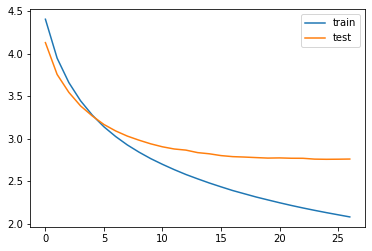

In [42]:
'''
시각화
'''
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 4. 실제 결과와 요약문 비교하기 (추상적 요약)

원래의 요약문(headlines 열)과 학습을 통해 얻은 추상적 요약의 결과를 비교해 보세요.

### (1) 인퍼런스 모델 구현하기

테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 아래와 같이 미리 준비

In [43]:
# 원문 단어 집합에서 정수 -> 단어를 얻음
src_index_to_word = src_tokenizer.index_word 
# 요약 단어 집합에서 단어 -> 정수를 얻음
tar_word_to_index = tar_tokenizer.word_index 
# 요약 단어 집합에서 정수 -> 단어를 얻음
tar_index_to_word = tar_tokenizer.index_word 

seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다는 것, 알고 계시나요?     
훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비했습니다.  
  
그러나 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에 부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다. 이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다  

In [44]:
'''
인코더 모델과 디코더 모델을 분리해서 설계
'''
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

'''
문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 
이는 뒤의 함수 decode_sequence()에 구현

훈련 과정에서와 달리 
LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
'''
decoder_outputs2, state_h2, state_c2 = decoder_lstm(
    dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [45]:
'''
어텐션 메커니즘을 사용하는 출력층을 설계
'''

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [46]:
'''
인퍼런스 단계에서 단어 시퀀스를 완성하는 함수 생성
'''
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

### (2) 모델 테스트하기

테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편하다. 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어 보자. 함수를 만들 때, Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고 Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외하도록 만들 거예요.

In [47]:
'''
주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 생성 

함수를 만들 때, 
- Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고 
- Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외
'''
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [48]:
'''
테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교
'''

for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : thai government threatened shut access facebook country unless removed illicit pages tuesday including video king wearing crop top footage reportedly filmed germany last year widely shared social media facebook still accessible thailand despite deadline passed 
실제 요약 : threatens facebook over king top video 
예측 요약 :  internet suspended over fb


원문 : anupam kher said censor board act villain films rather help respect filmmakers coming across people know stop film rather facilitate film added anupam said need self regulation st century 
실제 요약 : board should not act as for films 
예측 요약 :  to cbfc


원문 : members wimbledon park golf club voted sell year old club wimbledon organisers england tennis club million deal would see wimbledon almost triple size ground acquiring acre land golf club members receive compensation 
실제 요약 : wimbledon to buy yr old club for crore 
예측 요약 :  wimbledon match match wins wimbledon prize money


원문 : virat kohli slammed first ever test hundred england thu

예측 요약 :  footballer scores from jersey


원문 : scientists kilograms lab grown antarctica without two months per team employed water system led lighting monitoring carbon dioxide room hope kilograms fruits vegetables week may 
실제 요약 : in without and 
예측 요약 :  fish in river


원문 : second quarter earnings released week technology major apple revealed billion cash securities amount kept outside us purportedly tax purposes per apple filings billion invested corporate debt billion allocated billion kept asset backed securities 
실제 요약 : where does apple keep its billion cash 
예측 요약 :  apple billion in apple now billion


원문 : india second largest services firm infosys friday said open technology innovation hub arizona hire american workers state may infosys announced setting four hiring american workers next two years bengaluru based company hired american workers far 
실제 요약 : infosys to open tech in us by 
예측 요약 :  infosys to open new ceo


원문 : least three people killed tuesday three attacke

## 5. Summa을 이용해서 추출적 요약해보기

### (1) 패키지 설치 및 환경설정

In [ ]:
# !pip list | grep summa
# !pip install summa

In [ ]:
# mkdir -p ~/aiffel/news_summarization/data
# ln -s ~/data/*.csv ~/aiffel/news_summarization/data

### (2) 데이터 다운로드

In [49]:
import requests
from summa.summarizer import summarize

In [50]:
'''
매트릭스 시놉시스를 다운로드
'''
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [51]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### (3) summarize 사용하기

- text (str) : 요약할 테스트.  
- ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값  
- words (int or None, optional) – 출력에 포함할 단어 수.  
  만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.  
- split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환  
   
Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행해요. 그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있어요. 비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여볼게요. 원문의 0.005%만을 출력하도록 설정했어요.

In [52]:
'''
비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여볼게요. 
원문의 0.005%만을 출력하도록 설정했어요.
'''
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [53]:
'''
리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True
'''

print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [54]:
'''
단어의 수로 요약문의 크기를 조절할 수도 있어요. 단어를 50개만 선택
'''
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


# Ⅳ. 결론

## 1. 결과 분석
- 추상적 요약은 의미가 실제 헤드라인보다 직접적인 느낌이다. 가끔 이상한 표현이나 매끄럽지 못한 표현도 있다.
- 추출적 요약은 주요문장을 잘 추출하였다. 문장마다의 흐름은 깨지는 느낌이다.

## 2. 소감 및 차후 과제

- 함수화하는 작업을 하지 못하였는 보강해야겠다..    
- attention 메커니즘에서 맴돌았다. 좀 더 명쾌한 이해 보충해야겠다.   